In [1]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import IFrame as show
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='xpeigang', api_key='lwQSZWto6kkYyDeNh8SM')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
master_df = pd.read_csv("master_final_merged_df_protein_gdp.csv")

In [3]:
init_notebook_mode(connected=True)

### Analysis 1: PCA on different food sources

In [4]:
col_list = master_df.columns.tolist()
protein_col_list = col_list[4:19]

# Cereals is the total of others. No need to include it here 
protein_col_list.remove("Cereals")
protein_col_list_country = ["Country"]+protein_col_list

protein_group_df = master_df[protein_col_list_country]

# If Protein food group is empty. it is droped. 
df1 = protein_group_df[protein_group_df.isna().any(axis=1)]
# print ("Dropped Countries:{}".format(df1["Country"]))
protein_group_df.dropna(inplace = True)

protein_group_scaled = StandardScaler().fit_transform(protein_group_df[protein_col_list])

PCA

In [5]:
principalComponents = pca.fit_transform(protein_group_scaled)

pc_protein_1,pc_protein_2 = zip(*principalComponents)
protein_group_df["principal component 1"] = pc_protein_1
protein_group_df["principal component 2"] = pc_protein_2


X = protein_group_df[["principal component 1","principal component 2"]].values
protein_group_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,principal component 1,principal component 2
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,-0.518736,-1.454621
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,2.440719,-2.200208
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,0.596646,-2.699386
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,-1.686584,-0.548387
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,0.845285,1.230920


#### Continent Level

###### Countries to Continent 

In [6]:
# Code adapated from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3,country_alpha3_to_country_alpha2

continents_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Eurpoe'
}
countries = protein_group_df['Country'].tolist()

def convert_continents(countries):
    """
    This function tries to get the continent based on Country name.
    Since some countries names are differnt in the library we are using here,
    need to manually change those.
    
    This function also tries to rechieve an alpha 3 Country Code based on the name. 
    """
    continents = []
    country_codes = []
    for country in countries:
        try:
            country_code = country_name_to_country_alpha3(country)
            continent = continents_dict[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
            continents.append(continent)
            country_codes.append(country_code)
        except KeyError:
            print(country)
            continents.append(country)
            country_codes.append(country)
    return continents,country_codes


continents,country_codes = convert_continents(countries)

Bolivia (Plurinational State of)
China, Hong Kong SAR
China, Macao SAR
China, mainland
China, Taiwan Province of
Congo (note no data in Food suppley tables for DRC)
CÃƒÂ´te d'Ivoire
Iran (Islamic Republic of)
Republic of Korea
Eswatini
North Macedonia
Timor-Leste
Venezuela (Bolivarian Republic of)


In [7]:
# Make a new column called Continent using the continents information we just get. 
protein_group_df["Continent"] = continents

# A manually constructed country to contienent and country to country code list for those which have variation in names. 
manual_continent_dict = {"Bolivia (Plurinational State of)":"South America"
                         ,"China, Hong Kong SAR":"Asia"
                         ,"China, mainland":"Asia"
                         ,"China, Macao SAR":"Asia"
                         ,"China, Taiwan Province of":"Asia"
                         ,"Congo (note no data in Food suppley tables for DRC)":"Africa"
                         ,"CÃƒÂ´te d'Ivoire":"Africa"
                        ,"Iran (Islamic Republic of)":"Asia"
                        ,"Republic of Korea":"Asia"
                        ,"Eswatini":"Africa"
                        ,"North Macedonia":"Europe"
                        ,"Timor-Leste":"Asia"
                        ,"Venezuela (Bolivarian Republic of)":"South America"}

manual_country_code_dict = {"Bolivia (Plurinational State of)":"BOL"
                         ,"China, Hong Kong SAR":"HKG"
                         ,"China, mainland":"CHN"
                         ,"China, Macao SAR":"MAC"
                         ,"China, Taiwan Province of":"TWN"
                         ,"Congo (note no data in Food suppley tables for DRC)":"COG"
                         ,"CÃƒÂ´te d'Ivoire":"CIV"
                        ,"Iran (Islamic Republic of)":"IRN"
                        ,"Republic of Korea":"KOR"
                        ,"Eswatini":"SWZ"
                        ,"North Macedonia":"MKD"
                        ,"Republic of North Macedonia":"MKD"
                        ,"Timor-Leste":"TLS"
                        ,"Venezuela (Bolivarian Republic of)":"VEN"}

# Replace missing ones with correct continents. 
protein_group_df[protein_group_df["Country"].isna()]
# principalDf.to_csv("test.csv")
protein_group_df["Continent"] = protein_group_df["Continent"].replace(manual_continent_dict)


In [73]:
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
import matplotlib.pyplot as plt

def pca_plot(colors,df,cluster_name):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Colors represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    """
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA {}'.format(cluster_name), fontsize = 20)

    
    cluster_list = df[cluster_name].unique()
    for cluster,color in zip(cluster_list,colors):
        indicesToKeep = df[cluster_name] == cluster
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    ax = annotate_text(df,ax)
    ax.legend(cluster_list)
    ax.grid()

In [75]:
def annotate_text(df,ax):
    for i,row in df.iterrows():
        ax.annotate(row["Country"],(row['principal component 1'],row['principal component 2']))
    return ax

In [ ]:
colors = ['r', 'g', 'b','c','m','y']
pca_plot(colors,protein_group_df,"Continent")

###### K means on Top of PCA (Unable to fix the legend here. Shape represents continent, and colors represent cluster)

In [10]:
#K means Clustering 
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
from sklearn.cluster import KMeans

def perform_kmeans(X, n_clust):
    """
    This function handles K means clustering. 
    """
    model = KMeans(n_clust)
    model.fit(X)
    cluster_labels = model.predict(X)
    cent = model.cluster_centers_
    return (cluster_labels, cent)

def pca_kmeans_plot(colors, mark_shapes,df,cluster_name,centers):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Shapes represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    Colors represent the clusters kmeans assigns the point to. 
    """
    fig_k = plt.figure(figsize = (8,8))
    ax = fig_k.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA Kmeans Clustering {}'.format(cluster_name), fontsize = 20)

    cluster_list = df[cluster_name].unique()

    for cluster, ms in zip(cluster_list,mark_shapes):
        for kmeans_cluster,color in zip([i for i in range(len(colors))],colors):
            indicesToKeep = (df[cluster_name] == cluster) & (df["{}_Cluster".format(cluster_name)] == kmeans_cluster)
            ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , marker = ms
                   , s = 50)

    ax.legend(mark_shapes,cluster_list)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.grid()

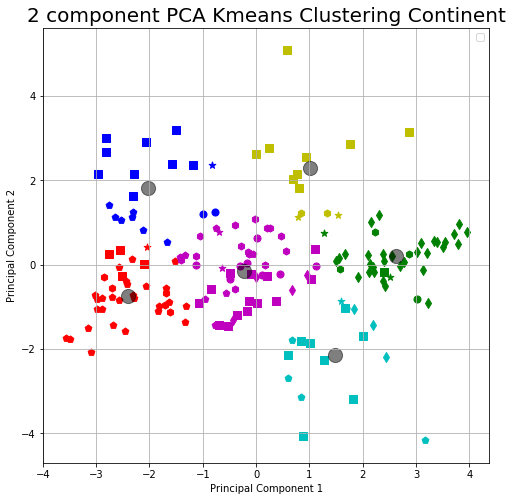

In [11]:

# Plot Contienent level 
X = protein_group_df[["principal component 1","principal component 2"]].values
continent_cluster_labels, continent_centers = perform_kmeans(X, 6)
protein_group_df["Continent_Cluster"] = continent_cluster_labels
mark_shapes = ['s','d','p','h','o','*']
colors = ['r', 'g', 'b','c','m','y']
pca_kmeans_plot(colors,mark_shapes,protein_group_df,"Continent",continent_centers)

In [12]:


def plot_plotly(df,cluster_name,centers,cluster_num,filename_prefix,additional):
    """
    This function draws plots using plotly. 
    It draws different traces with different shape and color based on the cluster and kmeans cluster it belongs to.abs
    In this case, cluster can be Continent, Region, and Income group. 
    
    Shape represents it's original cluster, and color represents the cluster K means assigns it to. 
    """
    data = []
    rainbow_colorscale =  [
    'rgb(150,0,90)','rgb(0,0,200)',
     'rgb(10,152,255)',
    'rgb(44,255,150)', 'rgb(151,255,0)',
    'rgb(255,234,0)','rgb(255,111,0)',
    'rgb(255,0,0)'
    ]
    if additional:
        kmeans_cluster_name = additional
    else:
        kmeans_cluster_name = "{}_Cluster".format(cluster_name)
        
    
    cluster_list = df[cluster_name].unique()
    for ms,cluster in enumerate(cluster_list):
        for kmeans_cluster in range(cluster_num):
            indicesToKeep = (df[cluster_name] == cluster) & (df[kmeans_cluster_name] == kmeans_cluster)
            trace0 = go.Scatter(
                x = df.loc[indicesToKeep, 'principal component 1'],
                y = df.loc[indicesToKeep, 'principal component 2'],
                name = str(cluster) + str(kmeans_cluster),
                mode = 'markers',
                marker = dict(
                    size = 9, 
                    color = rainbow_colorscale[kmeans_cluster],
                    line = dict(width = 1),
                    symbol = ms,
                ),
                text = df.loc[indicesToKeep,"Country"],
            )
            data.append(trace0);
    method = ""
    if centers != "no center":
        trace1 = go.Scatter(
            x = centers[:, 0],
            y = centers[:, 1],
            name = "Center",
            mode = 'markers',
            marker = dict(
                size = 20, 
                color = 'rgba(220, 220, 220, .4)', 
                line = dict(width = 1),
                ),
                )
        data.append(trace1)
        method = "K means"
    else:
        method = "Spectral"

    layout= go.Layout(
        title= '2 component PCA calculated with {} Data {} Clustering {} with {} clusters'.format(filename_prefix, method,cluster_name,cluster_num),
        hovermode= 'closest',
        xaxis= dict(
            title= 'principal component 1',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'principal component 2',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= True
        )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    py.iplot(fig, filename="{} {} Level Plot ".format(filename_prefix, cluster_name))

In [13]:
# Calling plotly function 
plot_plotly(protein_group_df,"Continent",continent_centers,6,"Protein Foods",'')

#### Region Level

###### Add Region and Development Level

In [14]:
# Read in UN's country classification dataset. 
class_df = pd.read_excel("CLASS.xls",skiprows = 4)
class_df = class_df.drop(["Lending category","Other","Economy","x","x.1","X"], axis = 1)
class_df.head()

,Code,Region,Income group
0,x,x,x
1,AFG,South Asia,Low income
2,ALB,Europe & Central Asia,Upper middle income
3,DZA,Middle East & North Africa,Upper middle income
4,ASM,East Asia & Pacific,Upper middle income


In [15]:
# Convert to Country Code Alpha 3 for easier merging 
protein_group_df["Code"] = country_codes
protein_group_df["Code"].replace(manual_country_code_dict, inplace = True)
protein_group_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,principal component 1,principal component 2,Continent,Continent_Cluster,Code
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,-0.518736,-1.454621,Asia,4,AFG
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,2.440719,-2.200208,Eurpoe,3,ALB
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,0.596646,-2.699386,Africa,3,DZA
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,-1.686584,-0.548387,Africa,0,AGO
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,0.845285,1.230920,North America,5,ATG


In [16]:
# Intermediate dataset combined using Country Code, which gives us information on country classification. 
protein_group_merged_df = protein_group_df.merge(class_df,how= "left", on="Code")
protein_group_merged_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,...,Barley,Pulses,Starchy roots,principal component 1,principal component 2,Continent,Continent_Cluster,Code,Region,Income group
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,...,0.72,1.56,0.22,-0.518736,-1.454621,Asia,4,AFG,South Asia,Low income
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,...,0.03,3.06,1.86,2.440719,-2.200208,Eurpoe,3,ALB,Europe & Central Asia,Upper middle income
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,...,2.61,4.55,2.67,0.596646,-2.699386,Africa,3,DZA,Middle East & North Africa,Upper middle income
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,...,0.00,5.23,7.13,-1.686584,-0.548387,Africa,0,AGO,Sub-Saharan Africa,Lower middle income
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,...,0.00,1.66,0.86,0.845285,1.230920,North America,5,ATG,Latin America & Caribbean,High income


['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


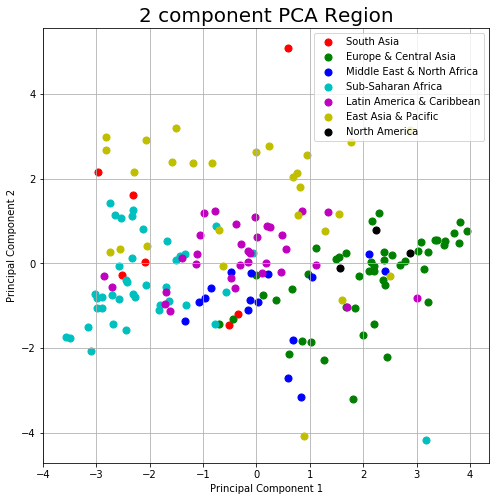

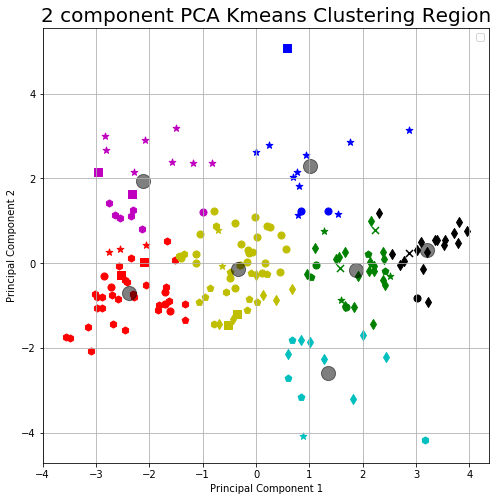

In [17]:
# Plot using matlablib on Region level.
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,protein_group_merged_df,"Region")

region_cluster_labels, region_centers = perform_kmeans(X, 7)
protein_group_merged_df["Region_Cluster"] = region_cluster_labels
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_df,"Region",region_centers)

In [18]:
# Plot using plotly on Region level.

plot_plotly(protein_group_merged_df,"Region",region_centers,7,"Protein Foods",'')

#### Income Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


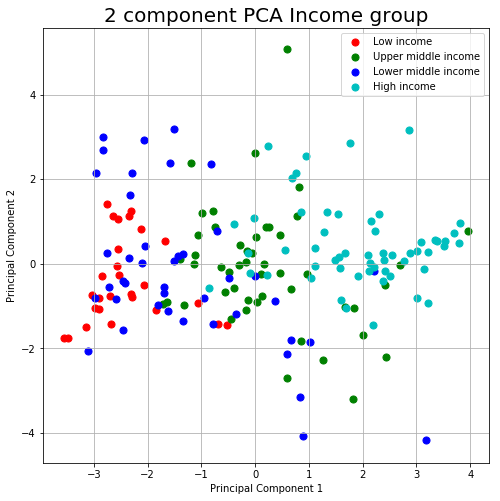

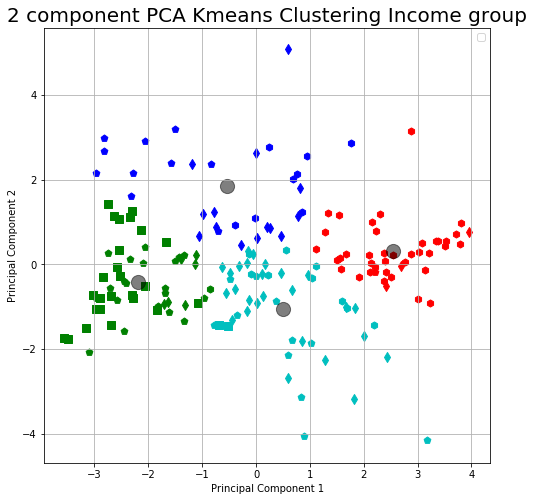

In [19]:
# Plot using matlablib on Income level.

colors_income = ['r', 'g', 'b','c']
pca_plot(colors_income,protein_group_merged_df,"Income group")
mark_shapes_income = ['s','d','p','h']
income_cluster_labels, income_centers = perform_kmeans(X, 4)
protein_group_merged_df["Income group_Cluster"] = income_cluster_labels


pca_kmeans_plot(colors_income,mark_shapes_income,protein_group_merged_df,"Income group",income_centers)

# Output to csv 
protein_group_merged_df.to_csv("pca_protein.csv")

In [20]:

# Plotly on Income level
plot_plotly(protein_group_merged_df,"Income group",income_centers,4,"Protein Foods",'')

### Analysis 2: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare Dataset
###### For this analysis, we groub bovine meat sheep goat pigmeat and poultry as a food group. Same for milk and egg.We then calculate a urban rural ration by dividing urban population with rural population. Last, we calculate a permanent crops ratio by dividing permanent crop area by total country area. 

###### This results in a dataset with Bovine_Sheep_Pigmeat_Poultry, Cereals, Milk_Egg, Fish_x, Av 2011+2012+2013 extracted from WDI (constant 2010 Us dollars)Urban_Rural_ratio  Permenent_Crops_Ratio, Country, Code, Income group, Region, and Continent as columns. 


In [21]:


protein_group_merged_df['Bovine_Sheep_Pigmeat_Poultry'] = protein_group_merged_df['Bovine meat']+protein_group_merged_df['Sheep and goat meat']+protein_group_merged_df['Pigmeat']+protein_group_merged_df['Poultry']
protein_group_merged_df['Milk_Egg'] = protein_group_merged_df['Milk']+protein_group_merged_df['Eggs']
protein_group_merged_master_df = protein_group_merged_df.merge(master_df,how="left",on="Country")
protein_group_merged_master_df['Urban_Rural_ratio'] = protein_group_merged_master_df["Urban population"]/protein_group_merged_master_df["Rural population"]
protein_group_merged_master_df['Permenent_Crops_Ratio'] = protein_group_merged_master_df['Permanent crops area']/ protein_group_merged_master_df['Total area of the country (excl. coastal waters)']
# protein_group_merged_final_master_df = protein_group_merged_master_df.merge(principalDf,how="left",on ="Country")
socio_cols = ['Bovine_Sheep_Pigmeat_Poultry','Cereals','Milk_Egg','Fish_x'
              ,' Av 2011+2012+2013 extracted from WDI (constant 2010 US$)'
              ,'Urban_Rural_ratio','Permenent_Crops_Ratio']

country_cols = ['Country','Code','Income group','Region','Continent']

desired_cols = socio_cols + country_cols

socio_pca_df = protein_group_merged_master_df[desired_cols]
socio_pca_df.head()

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group,Region,Continent
0,4.82,41.39,6.34,0.02,572.815028,0.328817,0.001838,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,4271.534293,1.429285,0.026748,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,4555.191581,2.395336,0.003880,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,3709.969541,0.528939,0.002326,Angola,AGO,Lower middle income,Sub-Saharan Africa,Africa
4,27.84,16.60,13.52,13.11,11929.279270,0.300981,0.022727,Antigua and Barbuda,ATG,High income,Latin America & Caribbean,North America


In [66]:
# Missing Values 
print("Countries with missing values {}".format(socio_pca_df[pd.isnull(socio_pca_df).any(axis=1)]["Country"].tolist()))

Countries with missing values ['Bermuda', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', "Democratic People's Republic of Korea", 'Djibouti', 'French Polynesia', 'New Caledonia', 'Republic of Moldova', 'North Macedonia']


In [23]:
# Since missing values cannot be processing using pca, we will simply drop them.

socio_pca_dropped_df = socio_pca_df.dropna()

socio_scaled = StandardScaler().fit_transform(socio_pca_dropped_df[socio_cols])


###### PCA

In [24]:
principalComponents_socio = pca.fit_transform(socio_scaled)

# principalDf_socio = pd.DataFrame(data = principalComponents_socio
#              , columns = ['principal component 1', 'principal component 2'])
pc_socio_1,pc_socio_2 = zip(*principalComponents_socio)
socio_pca_dropped_df["principal component 1"] = pc_socio_1
socio_pca_dropped_df["principal component 2"] = pc_socio_2

socio_pca_dropped_df = socio_pca_dropped_df.rename({"Income group_y":"Income group","Region_y":"Region","Continent_x":"Continent"}, axis = 1)
X_socio = socio_pca_dropped_df[["principal component 1","principal component 2"]].values

#### Continent Level

['Asia' 'Eurpoe' 'Africa' 'North America' 'South America' 'Australia']


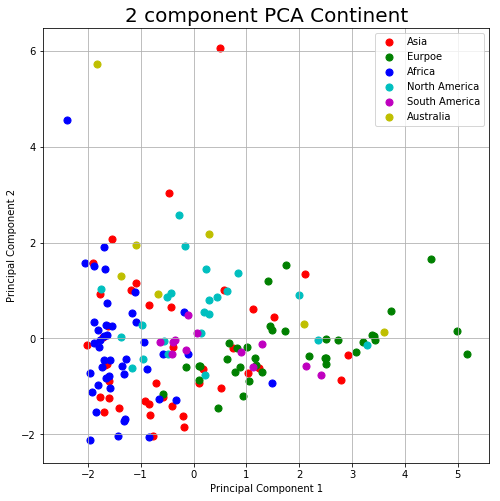

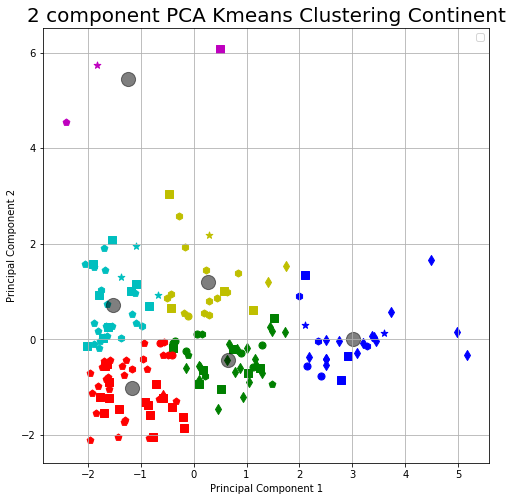

In [25]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,socio_pca_dropped_df,"Continent")

continent_cluster_labels_socio, continent_centers_socio = perform_kmeans(X_socio, 6)
socio_pca_dropped_df["Continent_Cluster"] = continent_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Continent",continent_centers_socio)

In [26]:
plot_plotly(socio_pca_dropped_df,"Continent",continent_centers_socio,6,"Socioeconomic + Foods",'')

#### Region Level 

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


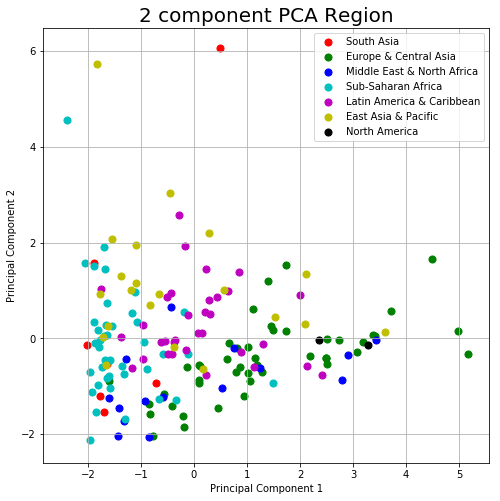

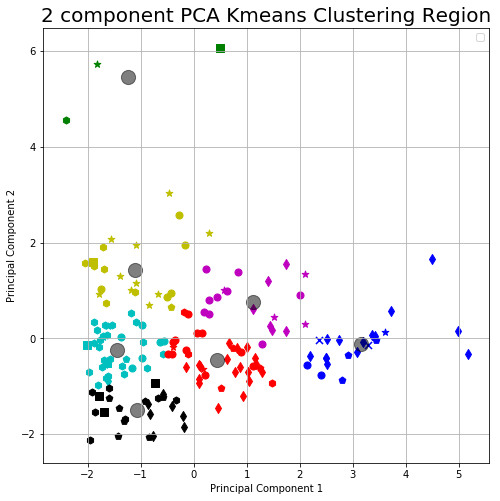

In [27]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,socio_pca_dropped_df,"Region")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 7)
socio_pca_dropped_df["Region_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Region",region_centers_socio)

In [28]:
plot_plotly(socio_pca_dropped_df,"Region",region_centers_socio,7, "Socioeconomic + Foods",'')

#### Development Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


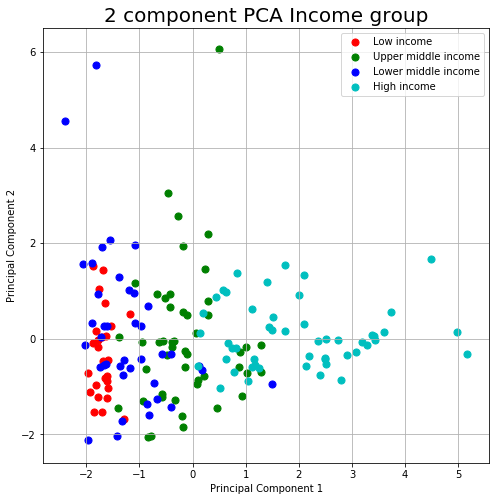

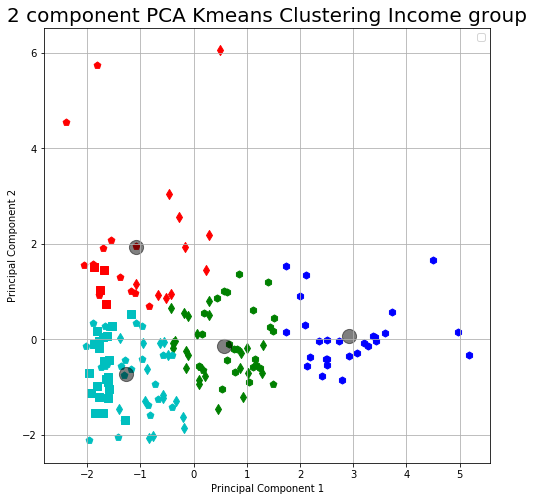

In [29]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,socio_pca_dropped_df,"Income group")

income_cluster_labels_socio, income_centers_socio = perform_kmeans(X_socio, 4)
socio_pca_dropped_df["Income group_Cluster"] = income_cluster_labels_socio
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,socio_pca_dropped_df,"Income group",income_centers_socio)

socio_pca_dropped_df.to_csv("pca_socio.csv")

In [30]:
plot_plotly(socio_pca_dropped_df,"Income group",income_centers_socio,4,"Socioeconomic + Foods",'')

### Analysis 3: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare the datasets

In [31]:
# http://apps.who.int/gho/data/node.main.CHILDSTUNTED?lang=en
stunting_df = pd.read_csv("NUTRITION_HA_2.csv", skiprows=1)
overweight_df = pd.read_csv("NUTRITION_WH2.csv",skiprows=1)

In [32]:
stunting_df.head()

,Country,Year,Both sexes
0,Afghanistan,2013,40.9
1,Afghanistan,2004,59.3
2,Afghanistan,1997,53.2
3,Albania,2017-2018,11.3
4,Albania,2008-2009,23.2


In [33]:
overweight_df.head()

,Country,Year,Both sexes
0,Afghanistan,2013,5.4
1,Afghanistan,2004,4.6
2,Afghanistan,1997,6.5
3,Albania,2017-2018,16.4
4,Albania,2008-2009,23.2


In [34]:
def get_nearest_year(df,name):
    """
    This function takes in a dataframe, and split the year range to half. 
    It keeps the start year. Then finds the latest year and adds it to the result dataframe. 
    """
    result_df = pd.DataFrame()
    country_list = df["Country"].unique().tolist()
    country_code_new = []
    df[[1,2]] = df['Year'].str.split('-',n=1, expand=True)
    df = df.drop(["Year",2], axis = 1)
    df = df.rename({1:"year"," Both sexes":name},axis = 1)
    df["year"] = df["year"].astype(int)
    for i in country_list:
        try:
            code = country_name_to_country_alpha3(i)
            country_code_new.append(code)
        except:
            code = i 
            country_code_new.append(code)
        result_df = result_df.append(df.loc[[df[df["Country"] == i]["year"].idxmax()]])
    return result_df,country_code_new

In [35]:
result_stunting_df,country_code_new_stunting = get_nearest_year(stunting_df,"stunting(percentage)")
result_overweight_df,country_code_new_overweight = get_nearest_year(overweight_df,"overweight(percentage)")

# get country code for both datasets for easier merging later
result_stunting_df["Code"] = country_code_new_stunting
result_overweight_df["Code"] = country_code_new_overweight

# Replace the missing ones with manully inputted country codes. 
result_stunting_df["Code"] = result_stunting_df["Code"].replace(manual_country_code_dict)
result_overweight_df["Code"] = result_overweight_df["Code"].replace(manual_country_code_dict)

In [64]:
# We merge this health dataset with the intermediate data set from previous anaylsis. 
protein_group_merged_stunting_master_df = socio_pca_df.merge(result_stunting_df,how="left", on="Code")
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_master_df.merge(result_overweight_df,how="left", on="Code")

In [65]:
# Check the missing values here. 
print("Countries with no children health data {}".format(protein_group_merged_stunting_ow_master_df[protein_group_merged_stunting_ow_master_df["stunting(percentage)"].isna()]["Country_x"].tolist()))

Countries with no children health data ['Antigua and Barbuda', 'Austria', 'Bahamas', 'Belgium', 'Bermuda', 'Canada', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'Croatia', 'Cyprus', 'Denmark', 'Dominica', 'Estonia', 'Finland', 'France', 'French Polynesia', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Caledonia', 'New Zealand', 'Norway', 'Portugal', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom']


In [38]:
# We are going to drop the missing values for now. 
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df.dropna(subset=['stunting(percentage)','overweight(percentage)']) 

In [39]:
# We only keep the useful columns here
socio_health_cols = socio_cols+['stunting(percentage)','overweight(percentage)']
socio_health_cols.remove(" Av 2011+2012+2013 extracted from WDI (constant 2010 US$)")
socio_health_cols.remove("Urban_Rural_ratio")
socio_health_cols.remove("Permenent_Crops_Ratio")
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df[socio_health_cols + country_cols]
# protein_group_merged_stunting_ow_master_df.rename({"Income group_y":"Income group","Fish_x":"Fish","Region_y":"Region"},axis = 1,inplace = True)

In [40]:
# Overview of our dataset. 
protein_group_merged_stunting_ow_master_df.head()

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,stunting(percentage),overweight(percentage),Country,Code,Income group,Region,Continent
0,4.82,41.39,6.34,0.02,40.9,5.4,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,11.3,16.4,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,11.7,12.4,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,37.6,3.4,Angola,AGO,Lower middle income,Sub-Saharan Africa,Africa
5,43.03,27.19,17.95,1.95,8.2,9.9,Argentina,ARG,High income,Latin America & Caribbean,South America


###### PCA 

In [41]:
health_scaled = StandardScaler().fit_transform(protein_group_merged_stunting_ow_master_df[socio_health_cols])

In [42]:
# Merge the calculated PCA value back to our dataset. 

principalComponents_health = pca.fit_transform(health_scaled)
pc_health_1,pc_health_2 = zip(*principalComponents_health)
protein_group_merged_stunting_ow_master_df["principal component 1"] = pc_health_1
protein_group_merged_stunting_ow_master_df["principal component 2"] = pc_health_2
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_ow_master_df.rename({"Income group_y":"Income group","Region_y":"Region"}, axis = 1)
X_health = protein_group_merged_stunting_ow_master_df[["principal component 1","principal component 2"]].values

#### Continent Level

['Asia' 'Eurpoe' 'Africa' 'South America' 'Australia' 'North America'
 'Europe']


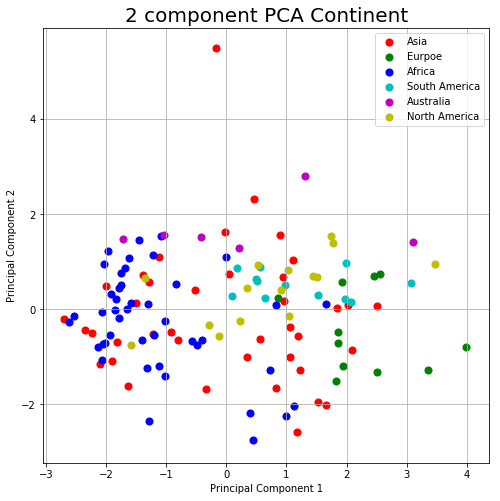

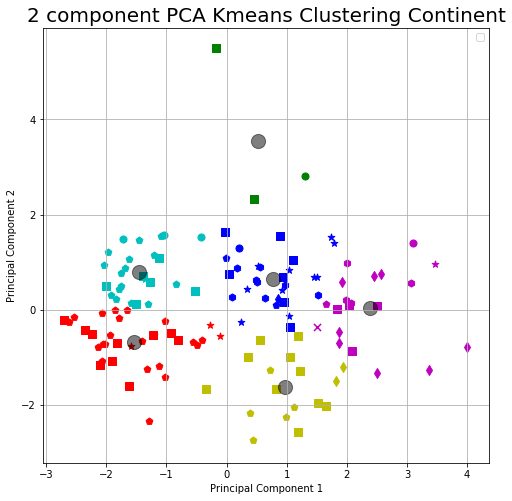

In [43]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Continent")

continent_cluster_labels_health, continent_centers_health = perform_kmeans(X_health, 6)
protein_group_merged_stunting_ow_master_df["Continent_Cluster"] = continent_cluster_labels_health
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Continent",continent_centers_health)

In [44]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Continent",continent_centers_health,6,"Health + Foods",'')

#### Region Level 

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


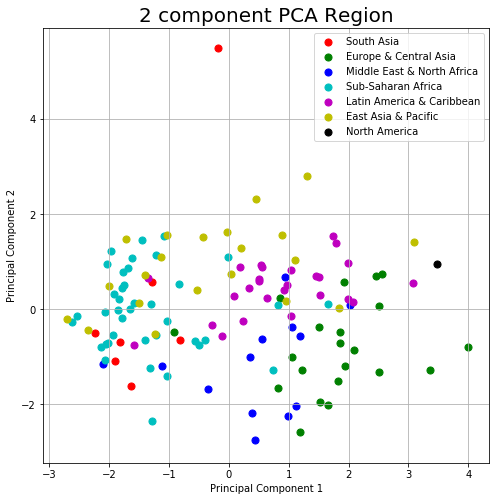

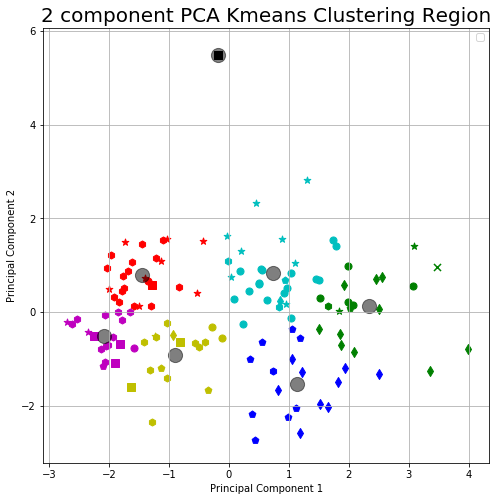

In [45]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Region")

region_cluster_labels_health, region_centers_health = perform_kmeans(X_health, 7)
protein_group_merged_stunting_ow_master_df["Region_Cluster"] = region_cluster_labels_health
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Region",region_centers_health)

In [46]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Region",region_centers_health,7,"Health + Foods",'')

#### Development Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


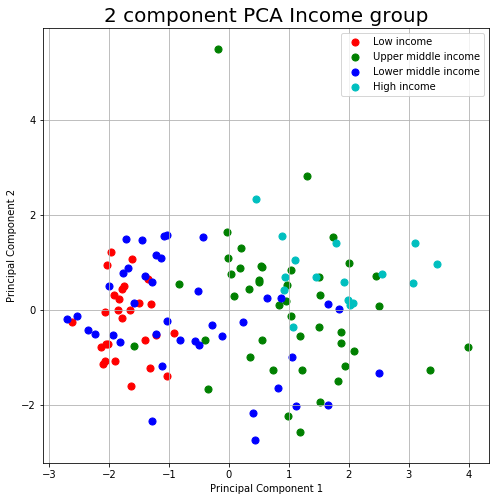

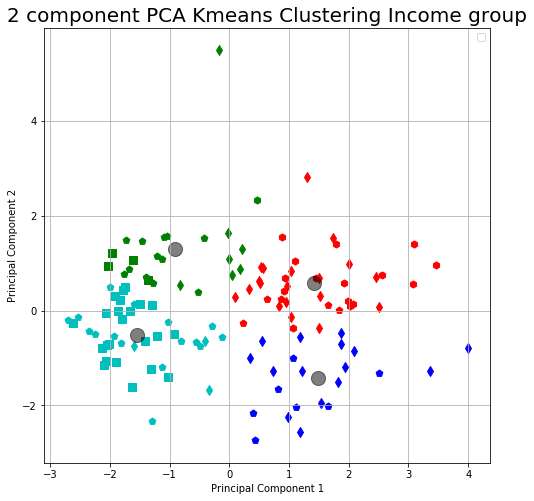

In [47]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,protein_group_merged_stunting_ow_master_df,"Income group")

income_cluster_labels_health, income_centers_health = perform_kmeans(X_health, 4)
protein_group_merged_stunting_ow_master_df["Income group_Cluster"] = income_cluster_labels_health
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,protein_group_merged_stunting_ow_master_df,"Income group",income_centers_health)

protein_group_merged_stunting_ow_master_df.to_csv("pca_health.csv")

In [48]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",income_centers_health,4,"Health + Foods",'')

### Analysis 4: Different Cluster Numbers & One Spectral Clustering

#### Additional Analysis 1 with Health data. K means using 3 clusters

In [49]:
cluster_labels_1_health, centers_1_health = perform_kmeans(X_health, 3)
protein_group_merged_stunting_ow_master_df["additional_cluster_1"] = cluster_labels_1_health

In [50]:
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",centers_1_health,3,"Health + Foods","additional_cluster_1")

####  Additional Analysis 2 with Health data. Spectral Clustering using 3 clusters

In [51]:
from sklearn.cluster import SpectralClustering

def spect_kmeans(X,cluste_num):
    clustering = SpectralClustering(cluste_num,assign_labels="discretize",random_state=0).fit(X)
    return clustering.labels_, "no center"

In [52]:
cluster_labels_2_health, centers_2_health = spect_kmeans(X_health, 3)
protein_group_merged_stunting_ow_master_df["additional_spect_cluster_2"] = cluster_labels_2_health
plot_plotly(protein_group_merged_stunting_ow_master_df,"Income group",centers_2_health,3,"Health + Foods","additional_spect_cluster_2")

#### Additional Analysis 3 with Socio data. K means Clustering using 3 clusters

In [53]:
cluster_labels_3, centers_3 = perform_kmeans(X_socio, 3)
socio_pca_dropped_df["additional_cluster_3"] = cluster_labels_3
plot_plotly(socio_pca_dropped_df,"Income group",centers_3,3,"Socioeconomic + Foods" ,"additional_cluster_3")

#### Additional Analysis 4 with Protein Foods data. K means Clustering using 3 clusters

In [54]:
cluster_labels_4, centers_4 = perform_kmeans(X, 3)
protein_group_merged_df["additional_cluster_4"] = cluster_labels_4
plot_plotly(protein_group_merged_df,"Income group",centers_4,3,"Foods","additional_cluster_4")